/var/folders/qs/pgv4p1w17nd_48f7d815vqr00000gn/T/ipykernel_75549/3128860657.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_before['Baseline Normalized'] = (data_before['Value'] - min_value) / (max_value - min_value)
/var/folders/qs/pgv4p1w17nd_48f7d815vqr00000gn/T/ipykernel_75549/3128860657.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_after['Baseline Normalized'] = (data_after['Value'] - min_value) / (max_value - min_value)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

.15ms vs. .2ms: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=3.379e+06
.2ms vs. .4ms: Mann-Whitney-Wilcoxon test two-sided, P_val:5.991e-97 U_stat=1.016e+07
.15ms vs. .4ms: Mann-Whitney-Wilcoxon test two-sided, P_val:1.159e-62 U_stat=6.274e+06


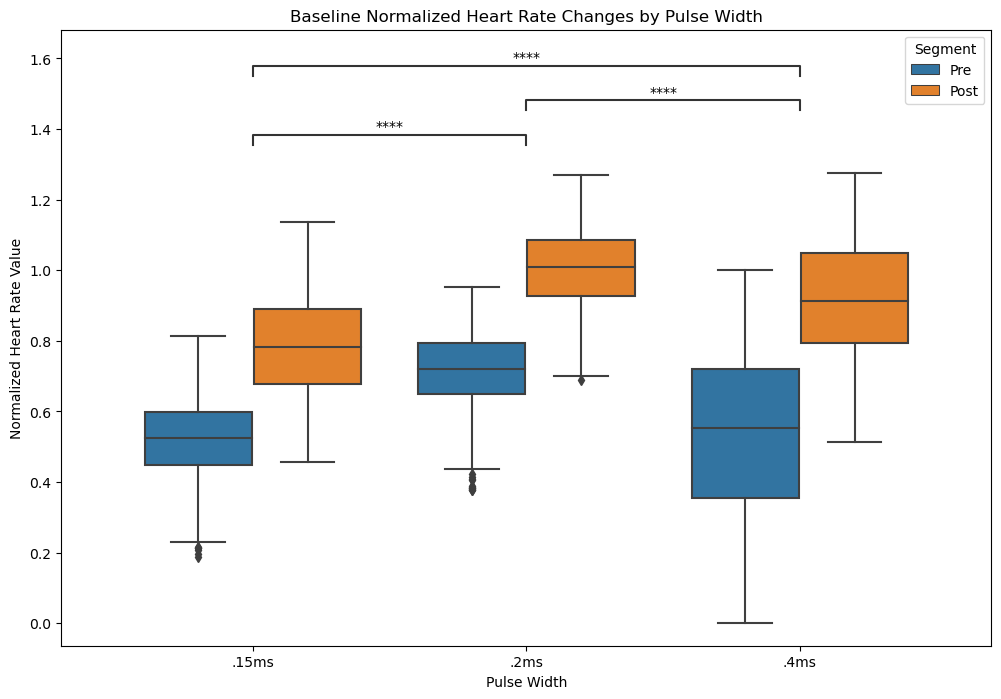

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statannotations.Annotator import Annotator

np.set_printoptions(precision=10)
# Load and preprocess the data
data = pd.read_csv('Dose_duty.csv')
data['Pulse Width'] = data['Date'].str.extract(r'(\.\d+ms)')
data['Trial'] = data['Date'].apply(lambda x: 2 if '_2' in x else 1)
# data['Segment'] = data['Segment'].map({'Pre': 'Pre', 'Post': 'Post'})
data_before = data[data['Segment'] == 'Pre']
data_after = data[data['Segment'] == 'Post']
min_value = data_before['Value'].min()
max_value = data_before['Value'].max()
data_before['Baseline Normalized'] = (data_before['Value'] - min_value) / (max_value - min_value)
data_after['Baseline Normalized'] = (data_after['Value'] - min_value) / (max_value - min_value)
baseline_normalized_data = pd.concat([data_before, data_after])

# Plotting
plt.figure(figsize=(12, 8))
box_plot = sns.boxplot(x='Pulse Width', y='Baseline Normalized', hue='Segment', data=baseline_normalized_data)
plt.title('Baseline Normalized Heart Rate Changes by Pulse Width')
plt.ylabel('Normalized Heart Rate Value')
plt.xlabel('Pulse Width')

# Perform statistical analysis
values = baseline_normalized_data['Baseline Normalized']
groups = baseline_normalized_data['Pulse Width']
kruskal_test = kruskal(data_before['Baseline Normalized'], data_after['Baseline Normalized'])
tukey_result = pairwise_tukeyhsd(values, groups, alpha=0.05)

# Find x-tick positions for significant markers
xticks_locs = box_plot.get_xticks()
xtick_labels = [t.get_text() for t in box_plot.get_xticklabels()]

# Annotate significance based on Tukey's HSD test
tukey_summary = tukey_result.summary().data[1:]  # Skip header row
for comparison in tukey_summary:
    if comparison[6]:  # If reject is True
        group1, group2 = comparison[0], comparison[1]
        index1, index2 = xtick_labels.index(group1), xtick_labels.index(group2)
        y, h, col = baseline_normalized_data['Baseline Normalized'].max() + 0.05, 0.02, 'k'
        # plt.plot([xticks_locs[index1], xticks_locs[index1], xticks_locs[index2], xticks_locs[index2]], [y, y+h, y+h, y], lw=1.5, c=col)
        # plt.text((xticks_locs[index1]+xticks_locs[index2])*0.5, y+h, "*", ha='center', va='bottom', color=col)

pairs = [('.15ms', '.2ms'), ('.2ms', '.4ms'), ('.15ms', '.4ms')]  # Adjust these pairs based on your actual data categories
annotator = Annotator(box_plot, pairs=pairs, data=baseline_normalized_data, x='Pulse Width', y='Value')
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
annotator.apply_and_annotate()
plt.show()


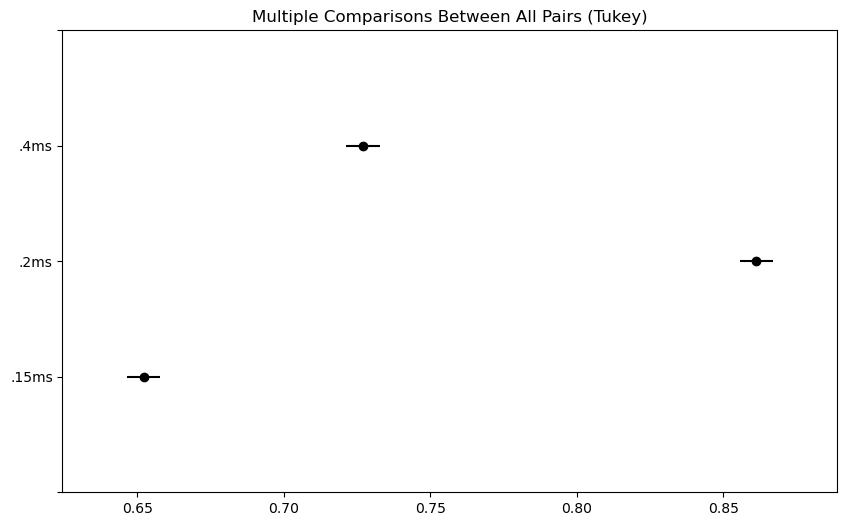

In [11]:
tukey_result.plot_simultaneous()    # This will show the comparison intervals
plt.show()

In [10]:
tukey_result.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
.15ms,.2ms,0.2091,0.0,0.1977,0.2204,True
.15ms,.4ms,0.0749,0.0,0.0635,0.0862,True
.2ms,.4ms,-0.1342,0.0,-0.1455,-0.1228,True


In [7]:
tukey_summary

[['.15ms', '.2ms', 0.2091, 0.0, 0.1977, 0.2204, True],
 ['.15ms', '.4ms', 0.0749, 0.0, 0.0635, 0.0862, True],
 ['.2ms', '.4ms', -0.1342, 0.0, -0.1455, -0.1228, True]]

KeyError: 'Baseline Normalized'

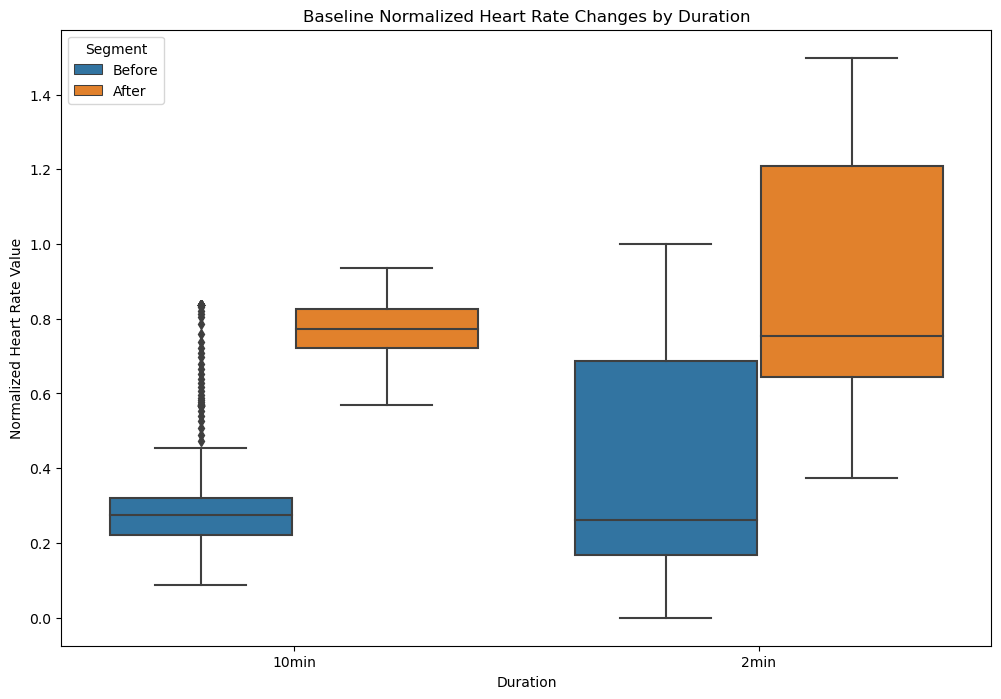

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load data
data = pd.read_csv('Dose_duration.csv')

# Extract duration information
data['Duration'] = data['Date'].str.extract('(\d+min)')
data['Trial'] = data['Date'].apply(lambda x: '2' if '_2' in x else '1')
data['Segment'] = data['Segment'].map({'Pre': 'Before', 'Post': 'After'})

# Calculate baseline normalization
data_before = data[data['Segment'] == 'Before']
data_after = data[data['Segment'] == 'After']
min_value = data_before['Value'].min()
max_value = data_before['Value'].max()
data['Baseline Normalized'] = (data['Value'] - min_value) / (max_value - min_value)

# Plotting
plt.figure(figsize=(12, 8))
box_plot = sns.boxplot(x='Duration', y='Baseline Normalized', hue='Segment', data=data)
plt.title('Baseline Normalized Heart Rate Changes by Duration')
plt.ylabel('Normalized Heart Rate Value')
plt.xlabel('Duration')

# Statistical analysis
values = data['Baseline Normalized']
groups = data['Duration']
kruskal_test = kruskal(data_before['Baseline Normalized'], data_after['Baseline Normalized'])
print("Kruskal-Wallis test result:", kruskal_test)

# Tukey's HSD test
tukey_result = pairwise_tukeyhsd(values, groups, alpha=0.05)
print(tukey_result.summary())

# Annotate significance
xticks_locs = box_plot.get_xticks()
xtick_labels = [t.get_text() for t in box_plot.get_xticklabels()]
tukey_summary = tukey_result.summary().data[1:]  # Skip header row
for comparison in tukey_summary:
    if comparison[6]:  # If reject is True
        group1, group2 = comparison[0], comparison[1]
        index1, index2 = xtick_labels.index(group1), xtick_labels.index(group2)
        y, h, col = data['Baseline Normalized'].max() + 0.05, 0.02, 'k'
        plt.plot([xticks_locs[index1], xticks_locs[index1], xticks_locs[index2], xticks_locs[index2]], [y, y+h, y+h, y], lw=1.5, c=col)
        plt.text((xticks_locs[index1]+xticks_locs[index2])*0.5, y+h, "*", ha='center', va='bottom', color=col)

plt.show()